# Optimizers

- Implementation constants: libraries, helper functions etc that remain the same throughout
- Gradient descent

### Implementation Constants

In [ ]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#defining loss function
def quad_loss(x, y):
  return x**2 + 10 * y**2

In [ ]:
#gradient of loss function
def quad_grad(x,y):
  dx = 2*x
  dy = 20*y
  return np.array([dx, dy])

In [ ]:
#plotting paths
def plot_paths(function, paths, labels, title):
  X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
  Z = function(X,Y)
  plt.figure(figsize=(8,6))
  plt.contour(X, Y, Z, levels=50, cmap='jet')
  for path, label in zip(paths, labels):
    plt.plot(path[:, 0], path[:, 1], label=label)
    plt.scatter(path[0,0], path[0,1], color='green', label='Start')
    plt.scatter(path[-1, 0], path[-1, 1], color='red', label='End')
  plt.title(title)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()

In [ ]:
def plot_losses(losses, labels, title):
  plt.figure(figsize=(8,6))
  for loss, label in zip(losses, labels):
    plt.plot(loss, label=label)
  plt.title(title)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Gradient Descent

- The directional derivative of a differentiable function indicates how fast the function increases in a given direction.
- The gradient points in the direction of maximum increase of the function.
- Going in the opposite direction can minize the function.
- If the loss function is differentiable w.r.t. parameters, finding its gradient and updating the parameters to go in its opposite direction can lead to the local minima of the function (or global minima for convex functions).

### Algorithm for Gradient Descent
- **Step 1:** Initialize $\theta$, $𝞰$. Define $L$.
- **Step 2:** Until convergence:
- Compute gradient: $$g = \nabla_\theta L(\theta_t)$$
- Update parameters:
$$\theta_{t+1} := \theta_t - 𝞰 . g$$

### Implementation of Gradient Descent

In [ ]:
def gradient_descent(start_point, epochs, grad_func, lr):
  #step 1: intialize parameters
  x,y = start_point
  #additional variables for visualization
  #these will be appended in the iterative loop for plotting
  path = [(x,y)]
  losses = [quad_loss(x,y)]
  #step 2: until convergence, compute gradients and update parameters
  for _ in range(epochs):
    grad = grad_func(x,y) #output of quad_grad
    x -= lr*grad[0]
    y -= lr*grad[1]
    path.append((x,y))
    losses.append(quad_loss(x,y))
  return np.array(path), losses

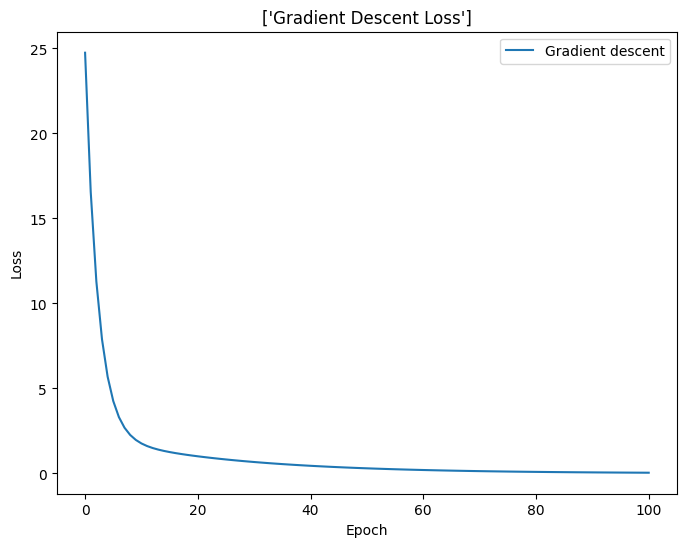

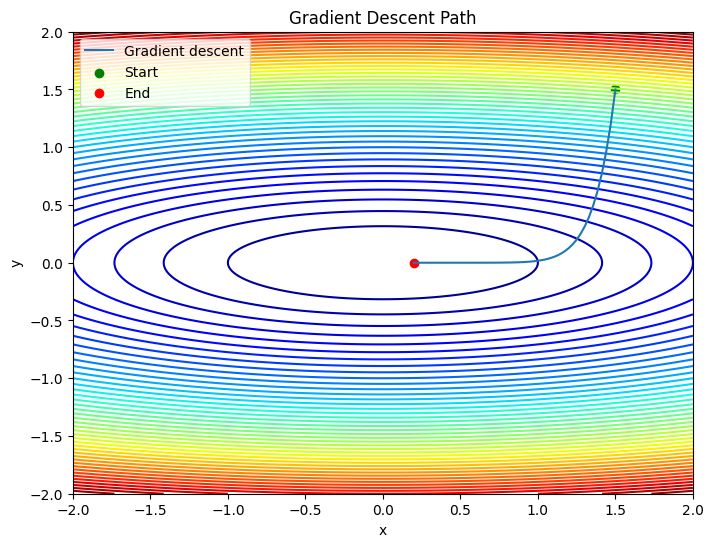

In [ ]:
#taking a very small learning rate
lr_gd = 0.01
epochs = 100
start_point = (1.5, 1.5)
path_gd, loss_gd = gradient_descent(start_point, epochs, quad_grad, lr_gd)
plot_losses([loss_gd], ['Gradient descent'], ['Gradient Descent Loss'])
plot_paths(quad_loss, [path_gd], ['Gradient descent'], 'Gradient Descent Path')

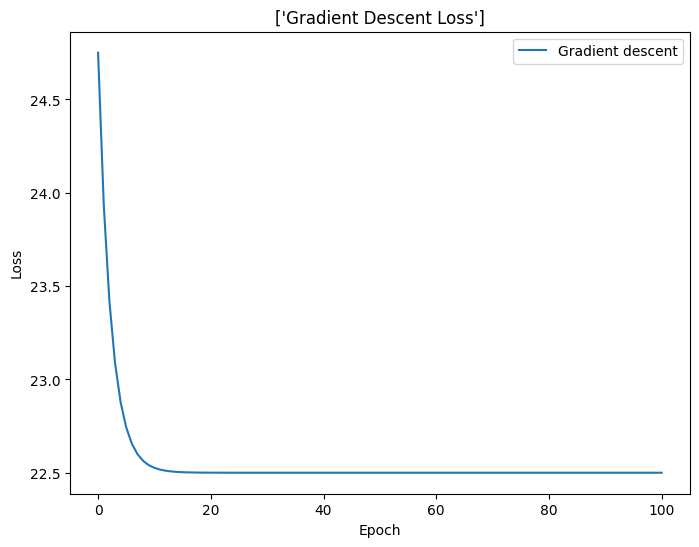

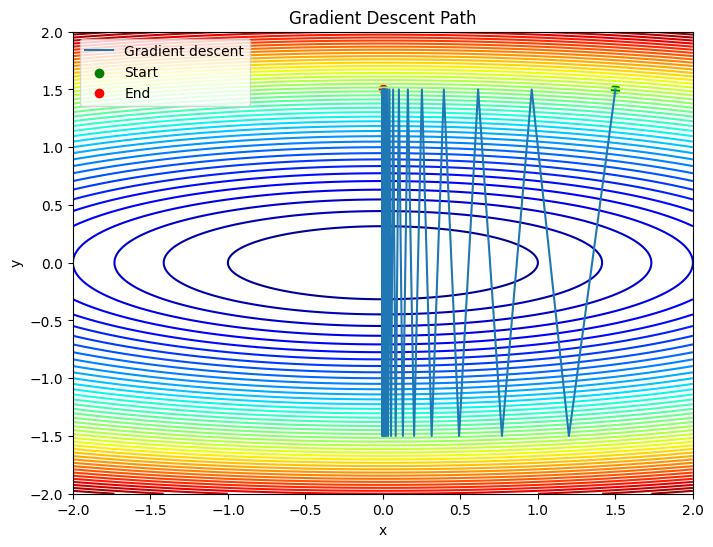

In [ ]:
#increasing values of learning rate
lr_gd = 0.1
epochs = 100
start_point = (1.5, 1.5)
path_gd, loss_gd = gradient_descent(start_point, epochs, quad_grad, lr_gd)
plot_losses([loss_gd], ['Gradient descent'], ['Gradient Descent Loss'])
plot_paths(quad_loss, [path_gd], ['Gradient descent'], 'Gradient Descent Path')

### Notes on Gradient Descent
- suitable for smooth, simple convex functions like quad losses given you know a good learning rate
- but if a good learning rate is not available or the function is not simple, momentum or adam can be used